
 
**Dataset:** Indoor Scene Recognition

**Fontes:**

* http://web.mit.edu/torralba/www/indoor.html
* https://github.com/ashrutkumar/Indoor-scene-recognition

**Evaluation Set:** 
* https://web.mit.edu/torralba/www/TrainingImages.txt
* https://web.mit.edu/torralba/www/TestImages.txt

In [1]:
import os
import pandas as pd

### Download Data

In [2]:
# Training Set
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

# Evaluating Set
#!wget https://web.mit.edu/torralba/www/TrainingImages.txt
#!wget https://web.mit.edu/torralba/www/TestImages.txt

--2022-06-18 18:16:16--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  12.6MB/s    in 3m 28s  

2022-06-18 18:19:44 (11.9 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [3]:
!tar -xvf ./indoorCVPR_09.tar

Streaming output truncated to the last 5000 lines.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/mall/GUM_

In [4]:
## GROUPS CHECKING
groups = {
  "Store":["bakery", "grocerystore", "clothingstore", "deli", "laundromat", "jewelleryshop", "bookstore", "videostore", "florist", "shoeshop", "mall", "toystore"],
  "Home":["bedroom", "nursery", "closet", "pantry", "children_room", "lobby", "dining_room", "corridor", "livingroom", "bathroom", "kitchen"],
  "Public spaces":["prisoncell", "library", "cloister", "church_inside", "waitingroom", "museum", "elevator", "subway", "locker_room", "trainstation", "airport_inside"],
  "Leisure":["buffet", "fastfood_restaurant", "concert_hall", "restaurant", "bar", "movietheater", "gameroom", "casino", "bowling", "gym", "hairsalon"],
  "Working place":["hospitalroom", "kindergarden", "restaurant", "kitchen", "artstudio", "classroom", "laboratorywet", "studiomusic", "operating_room", "office", "computerroom", "warehouse", "greenhouse", "dentaloffice", "tv_studio", "meeting_room"]
 }

# for group in groups.keys():
#  for category in groups[group]:
#    if category in list(labeldict.keys()):
#      pass
#    else:
#      print(category)

In [5]:
!rm -rf /Images

In [6]:
files=[x.split("/")[-1]for x in [x[0] for x in os.walk("Images")][1:]]
files.sort()
labeldict={}
count=0

for file in files:
    labeldict[file]=count
    count+=1
    
from collections import defaultdict
class_freq=defaultdict(int)
csvlist=[]

for file in files:
    images=os.listdir(os.path.join(os.getcwd() + "/Images",file))
    count=1
    for img in images:
        an=img.split(".")        
        newname=str(file)+"_"+str(count)+"."+str(an[-1])
        os.rename(os.path.join(os.getcwd() + "/Images",file,img),os.path.join(os.getcwd() + "/Images",newname))
        csvlist.append([file, labeldict[file],newname])
        class_freq[file]+=1
        count+=1
        
for file in files:
    os.rmdir(os.path.join(os.getcwd() + "/Images",file))

df = pd.DataFrame(csvlist,columns=["Category", "Category_Id","File"]) 
df.to_csv("Train.csv")
#!mv Train.csv ../Train.csv

In [ ]:
df["Weight"] = df["Category"].map(df["Category"].value_counts(normalize = True))

In [ ]:
df

,Category,Category_Id,File,Weight
0,airport_inside,0,airport_inside_1.jpg,0.038924
1,airport_inside,0,airport_inside_2.jpg,0.038924
2,airport_inside,0,airport_inside_3.jpg,0.038924
3,airport_inside,0,airport_inside_4.jpg,0.038924
4,airport_inside,0,airport_inside_5.jpg,0.038924
...,...,...,...,...
15615,winecellar,66,winecellar_265.jpg,0.017222
15616,winecellar,66,winecellar_266.jpg,0.017222
15617,winecellar,66,winecellar_267.jpg,0.017222
15618,winecellar,66,winecellar_268.jpg,0.017222


### Dataset

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
import glob
import random
import copy
import matplotlib.pyplot as plt
from math import floor
%matplotlib inline 

In [ ]:
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset,SubsetRandomSampler,Sampler
from torch import nn
import torch.nn.functional as F
from torch import optim

In [ ]:
from skimage import io, transform
from PIL import Image
import PIL.ImageEnhance as ie
import PIL.Image as im
from torch.autograd import Variable

In [ ]:
#from google.colab import files,drive

In [ ]:
class ImageDataset(Dataset): 
    
    def __init__(self, csv_file, root_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        # Id = File
        # Category = Category_Id
        img_name = os.path.join(self.root_dir, self.data_frame['File'][idx])         
        image = Image.open(img_name).convert('RGB')                               
        label = np.array(self.data_frame['Category_Id'][idx])                        
        if self.transform:            
            image = self.transform(image)                                         
        sample = (image, label) 
        return sample

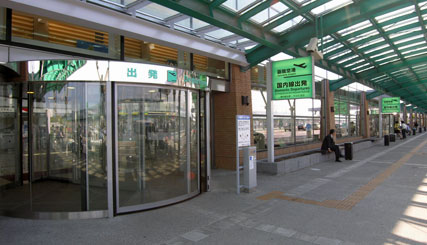

In [ ]:
idx = 11
img_name = os.path.join('./Images', df['File'][idx]) 
Image.open(img_name).convert('RGB')

In [ ]:
testando_transf = transforms.Compose([
        transforms.RandomResizedCrop(224)])

In [ ]:
transform_augmented = transforms.Compose([
        transforms.RandomResizedCrop(224),
        #PowerPIL(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                     ])
transform_raw = transforms.Compose([
                     transforms.Resize((224,224)),
                     transforms.ToTensor(),
                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) # https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2

transformation = transforms.Compose([
                     transforms.Resize((224,224)),
                     transforms.ToTensor()])

In [ ]:
trainset = ImageDataset(csv_file = 'Train.csv', root_dir = './Images', transform=transform_augmented)
valset   = ImageDataset(csv_file = 'Train.csv', root_dir = './Images', transform=transform_raw)
accset   = ImageDataset(csv_file = 'Train.csv', root_dir = './Images', transform=transform_raw)

### Outra alternativa

In [ ]:
def build_folders(in_path, out_path, out_file):
  try: 
    # Ajusta a estrutura de pastas
    files=[x.split("/")[-1]for x in [x[0] for x in os.walk(os.getcwd() + in_path)][1:]]
    files.sort()
    labeldict={}
    count=0

    for file in files:
        labeldict[file]=count
        count+=1
        
    class_freq=defaultdict(int)
    csvlist=[]

    for file in files:
        images=os.listdir(os.path.join(os.getcwd() + in_path,file))
        count=1
        for img in images:
            an=img.split(".")        
            newname=str(file)+"_"+str(count)+"."+str(an[-1])
            os.rename(os.path.join(os.getcwd() + in_path,file,img), os.path.join(os.getcwd() + out_path,newname))
            csvlist.append([file, labeldict[file],newname])
            class_freq[file]+=1
            count+=1
            
    for file in files:
        os.rmdir(os.path.join(os.getcwd() + in_path,file))

    shutil.rmtree(os.path.join(os.getcwd() + in_path))
    df = pd.DataFrame(csvlist,columns=["Category", "Category_Id","File"]) 
    df.to_csv(out_file)
    return df
  except:
    raise "Error"

In [ ]:
in_path = "/data/Images"
out_path = "/data/indoorCVPR_09"
out_file = "train.csv"
df = build_folders(in_path, out_path, out_file)